# Evaluating classifiers and k-NN classifiers

This week we'll look at training a k-nearest neighbour classifier and at some of the ways we can evaluate classifiers.

First, let's train a k-nearest neighbour classifier on one of the files we used this week. First off, let's import the packages we want and load the data file as we have done previously. Then we'll take a look with `head()` to see if it looks ok.

**Remember to change `DATAFILE` below**

In [4]:
import sklearn as sk
import pandas as pd

DATAFILE = 'C:/keras/balanced.csv'
balanced = pd.read_csv(DATAFILE)

In [5]:
balanced.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,19144,140000,2,2,2,31,0,0,0,0,...,140254,139679,141748,6400,6600,6500,5100,5300,6000,0
1,17658,80000,2,2,1,40,0,0,0,0,...,21604,22035,22496,2072,1651,1359,790,817,821,0
2,9386,10000,2,3,1,42,2,0,0,0,...,9604,9800,0,1228,1000,192,196,0,8138,1
3,25391,220000,2,2,2,29,0,0,2,0,...,39770,31840,33173,6000,2,3006,2000,2000,1500,0
4,1697,20000,1,2,1,35,1,2,2,0,...,20427,19377,19386,1000,1000,1000,1500,900,1000,1


Let's now split the data into an `X` and `y` (`default payment next month` is the target class) and then create a training and test split.

In [6]:
# Split into the attributes and the target. Uses python multiple assignment statement. 
X, y = balanced.iloc[:,:-1], balanced.iloc[:,-1]
#X.head()
#y.head()

# Now split these into a training / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# More pandas functions ...
# info() gives a summary of the DataFrame or Series
# shape attribute gives the number of rows and columns

# X_train.info()
# X_train.shape

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1400, 24)
y_train: (1400,)
X_test: (600, 24)
y_test: (600,)


# k-NN classifier

There are several variants of kNN in scikit-learn. You can read about them here: https://scikit-learn.org/stable/modules/neighbors.html

We're going to use `sklearn.neighbors.KNeighborsClassifier` because we want to do classification. There are also approaches for regression and various tweaks for calculatiing the neighbours in an efficient manner. We'll just use the default parameters for everything except the number of neighbours and then `fit` the data to the classifier.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Construct a kNN classifier. Note there is a default value for the number of neighbours, but we'll change it.
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)

# print the potential classes 
clf.classes_


array([0, 1], dtype=int64)

Let's look at the classifier, then look at the prediction for a particular point in the test set.

In [8]:
# We can print the classifier like this.
# clf

# Let's look at one specific prediction.
test_idx = 4
test_point = X_test.iloc[test_idx]

pred_test = clf.predict([test_point])
pred_test_probs = clf.predict_proba([test_point])

print("Testing point", test_idx, "; predicted as", pred_test[0],
      "; actually", y_test.iloc[test_idx], "; probabilities", pred_test_probs[0])

Testing point 4 ; predicted as 1 ; actually 1 ; probabilities [0. 1.]


Like we did last week, let's make predictions for the test partition, then display and plot a confusion matrix. Note: this time we normalise the plotted confusion matrix for something different. 

[[148 148]
 [118 186]]


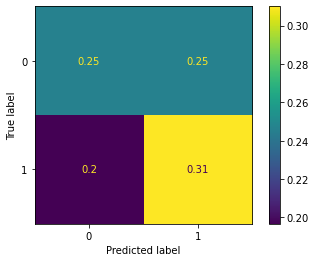

In [16]:
y_pred = clf.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# normalize="all" converts the raw numbers to proportions.
# Can be used in both of the following functions.
mat = confusion_matrix(y_test, y_pred)
print(mat)

plot_confusion_matrix(clf, X_test, y_test, normalize="all");
#plot_confusion_matrix(clf, X_test, y_test, normalize="all");

We can look at some other evaluation metrics that maybe make more sense.

Btw, `score` can be used in many of the scikit classifiers. It works out the mean accuracy of the classifier given a test set.

In [10]:
clf.score(X_test, y_test)

0.5566666666666666

The `classification_report` function gives an overall report, but you can get at each of the measures separately. See: https://scikit-learn.org/stable/modules/model_evaluation.html

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53       296
           1       0.56      0.61      0.58       304

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.55       600
weighted avg       0.56      0.56      0.56       600



Finally, let's plot the ROC curve and work out the AUC value. First we need to work out the probabilities for the positive class for each test point.

Then we use the `roc_auc_score` function to work out the AUC value.

Plotting the ROC curve is a bit more cumbersome. We use the `roc_curve` function to return the TPRs and FPRs corresponding to a set of decision thresholds. 

The AUC is 0.566
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.056 vs 0.068
0.800	0.276 vs 0.230
0.600	0.612 vs 0.500
0.400	0.852 vs 0.753
0.200	0.977 vs 0.919
0.000	1.000 vs 1.000


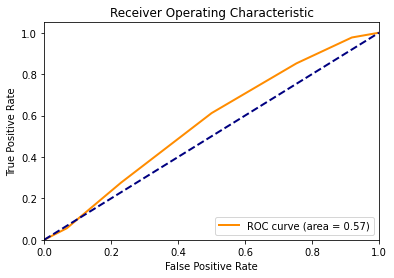

In [12]:


# Get the probabilities of each class.
y_probs = clf.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()